<a href="https://colab.research.google.com/github/satyamkulkarni122/Assignment/blob/main/Project_Retail_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail Sales Predictions**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary**

Write the summary here within 500-600 words.

# **GitHub Link**

https://github.com/satyamkulkarni122/Capstone-Project/blob/main/Project_Retail_Sales_Predictions.ipynb

# **Problem Statement**


The Rossmann drug store chain, encompassing over 3,000 stores across seven European countries, faces a challenge in accurately predicting daily sales for up to six weeks in advance. Currently, store managers employ diverse methodologies to forecast sales, considering factors such as promotions, competition, holidays, seasonality, and locality. The existing approach yields varied accuracy due to the decentralized prediction process, wherein individual managers rely on unique circumstances. Given historical sales data for 1,115 Rossmann stores, objective of project is development of a model that can generalize well across the entire retail chain. The ultimate goal is to enhance overall sales prediction accuracy and provide a standardized, reliable method for Rossmann store managers across the diverse operational landscape.

**Data Description**

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [219]:
!pip install plotly

In [220]:
!pip install statsmodels

In [334]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
# Load Dataset

filepath='/content/drive/MyDrive/Projects/Introduction to Machine Learning/'
store_df=pd.read_csv(filepath + 'store.csv')
rossman_df=pd.read_csv(filepath + 'Rossmann Stores Data.csv',low_memory=False)

### Dataset First View

In [224]:
# Dataset First Look

store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [225]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [226]:
# Dataset Rows & Columns count
print(rossman_df.shape)
print(store_df.shape)

#Check for NaN values
store_df.isna().sum()

(1017209, 9)
(1115, 10)


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are 5 columns with significant number of NaN values.Let's impute those with approriate values. Competition distance and since month can not be predicted as they depends various factors specially for stores with different locations. Generally people starting stores follow a trend hence year can be set as mode of overall column.

As stores not participating(0) in Promo02 its related values(week,year and interval) will also be 0.

After that we can conbine both dataset.

In [227]:
# Create copy of store dataset
store_new = store_df.copy()

# impute na values for Competition data as mentioned above
store_new['CompetitionDistance'] = store_new['CompetitionDistance'].fillna(0)
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)
competition_year_mode = store_new['CompetitionOpenSinceYear'].mode().iloc[0]
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(competition_year_mode)

# impute na values for promo02 data as mentioned above
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

# Combine both dataset
final1 = pd.merge(left=rossman_df, right=store_new,how='left', on=['Store'])

print('After Merge of dataframes')
print(final1.isna().sum())
print(final1.head())

After Merge of dataframes
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   
2      3          5  31-07-2015   8314        821     1      1            0   
3      4          5  31-07-2015  13995       1498     1      1            0   
4      5

In [228]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


### Dataset Information

In [229]:
# Dataset Info
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#### Duplicate Values

In [230]:
# Dataset Duplicate Value Count

duplicate_rows = final1.duplicated()

print("Duplicate rows:")
print(final1[duplicate_rows])


Duplicate rows:
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []


#### Missing Values/Null Values

In [231]:
# Missing Values/Null Values Count
final1.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<Axes: >

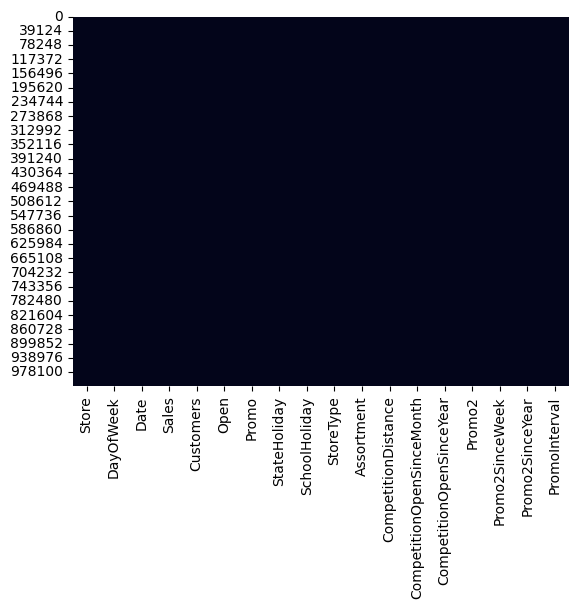

In [232]:
# Visualizing the missing values
sns.heatmap(final1.isnull(), cbar=False)

### What did you know about your dataset?

There are two datasets one contains information about rossmann stores and another one about sales and other factors affecting it.After combining both there are 18 columns.

## ***2. Understanding Your Variables***

In [233]:
# Dataset Columns
final1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [234]:
# Dataset Describe
final1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.415982e+03,4.926878e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.710253e+03,4.283543e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+02,0.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.320000e+03,4.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


### Variables Description

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [235]:
# Check Unique Values for each variable.
final1.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       13
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

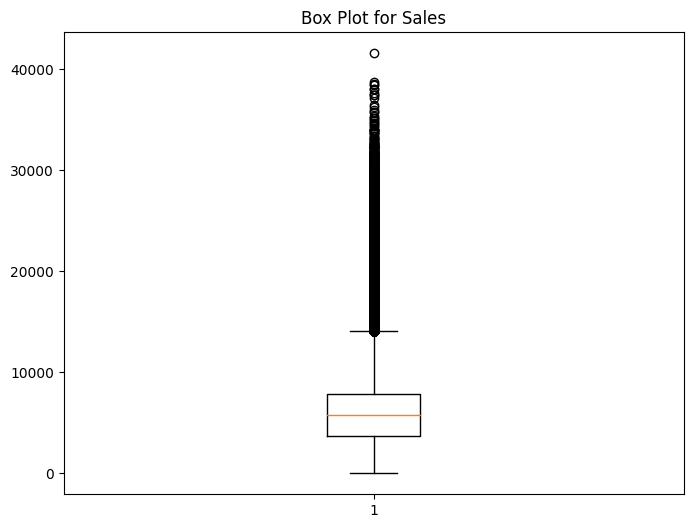

In [236]:
# Write your code to make your dataset analysis ready.
# Remove Outliers from sales, customers and CompetitionDistance data.

# Create a box plot for the 'Sales' column
plt.figure(figsize=(8, 6))
plt.boxplot(final1['Sales'])
plt.title('Box Plot for Sales')
plt.show()

In [237]:
n = 1  # Sales data has 1 outlier

# Find the nth highest values in the 'Sales' column
nth_highest_values = final1['Sales'].nlargest(n)

# Retrieve rows with the nth highest values
rows_with_nth_highest = final1[final1['Sales'].isin(nth_highest_values)]

# Display the result
print(rows_with_nth_highest)

       Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
44393    909          1  22-06-2015  41551       1721     1      0   

      StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
44393            0              0         a          c               1680.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
44393                        0.0                    2013.0       1   

       Promo2SinceWeek  Promo2SinceYear    PromoInterval  
44393             45.0           2009.0  Feb,May,Aug,Nov  


In [238]:
outlier_rows = [44393]

# Drop the rows with the specified row numbers
final1_no_outliers = final1.drop(outlier_rows)

# Print the new highest value of the 'Sales' column
new_highest_sales_value = final1_no_outliers['Sales'].max()
print(f"The new highest value of the 'Sales' column is: {new_highest_sales_value}")

The new highest value of the 'Sales' column is: 38722


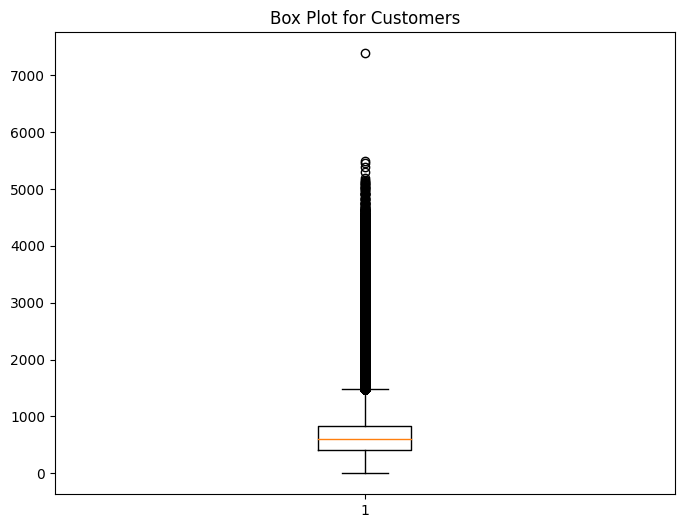

In [239]:
# Create a box plot for the 'Customers' column
plt.figure(figsize=(8, 6))
plt.boxplot(final1['Customers'])
plt.title('Box Plot for Customers')
plt.show()

In [240]:
n = 1  # Customers data has 1 outlier

# Find the nth highest values in the 'Customers' column
nth_highest_values = final1['Customers'].nlargest(n)

# Retrieve rows with the nth highest values
rows_with_nth_highest = final1[final1['Customers'].isin(nth_highest_values)]

# Display the result
print(rows_with_nth_highest)

        Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
993496    817          2  22-01-2013  27190       7388     1      1   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
993496            0              0         a          a                140.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
993496                        3.0                    2006.0       0   

        Promo2SinceWeek  Promo2SinceYear PromoInterval  
993496              0.0              0.0             0  


In [241]:
outlier_rows = [993496]

# Drop the rows with the specified row numbers
final1_no_outliers = final1.drop(outlier_rows)

# Print the new highest value of the 'Sales' column
new_highest_Customers_value = final1_no_outliers['Customers'].max()
print(f"The new highest value of the 'Customers' column is: {new_highest_Customers_value}")

The new highest value of the 'Customers' column is: 5494


There are 942 rows for maximum value of CompetitionDistance hence it can not be considered as outliers. as there may cluster of stores at that locations.

Now, As there 3000 stores but data available is for only 1115 stores, so we need to generalize the model. Store type is variable which can be used to generalize the stores data and its model.Converting date column to datetime format

In [242]:
final1['Date'] = pd.to_datetime(final1['Date'])

# Extracting day, month, and year
final1['Day'] = final1['Date'].dt.day
final1['Month'] = final1['Date'].dt.month
final1['Year'] = final1['Date'].dt.year


<ipython-input-242-cb358078c93e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  final1['Date'] = pd.to_datetime(final1['Date'])


### What all manipulations have you done and insights you found?

Initially merged two datasets from which one is stores data and another is sales data for rossmann stores.Also filled NaN values in 6 columns from stores dataset.

Removed the outliers from sales and customer data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Line Charts - Effect of Date and Time on sales and number of customers

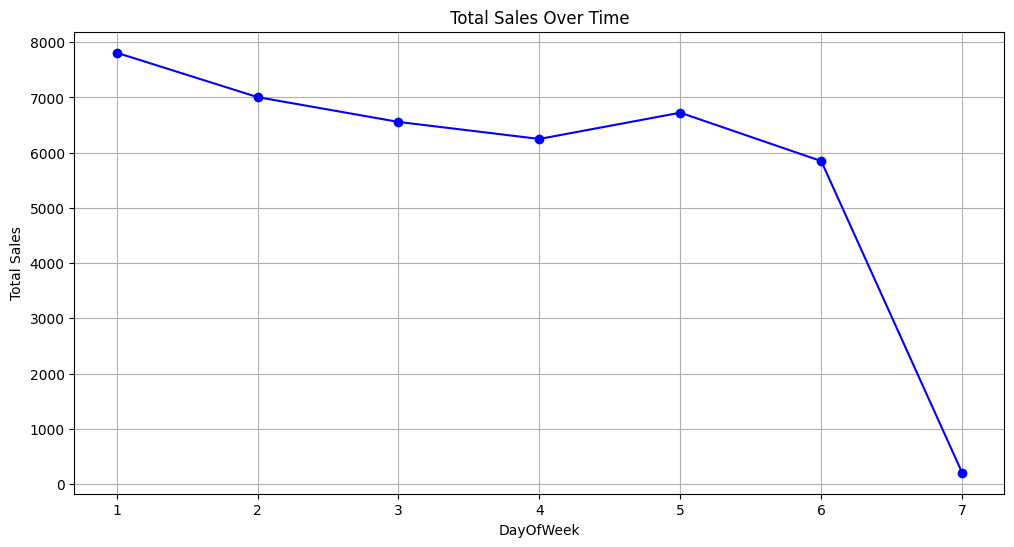

In [243]:
# Chart - 1 visualization code
# Group by DayOfWeek and calculate the total sales for each date
sales_by_DayOfWeek = final1.groupby('DayOfWeek')['Sales'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(sales_by_DayOfWeek['DayOfWeek'], sales_by_DayOfWeek['Sales'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

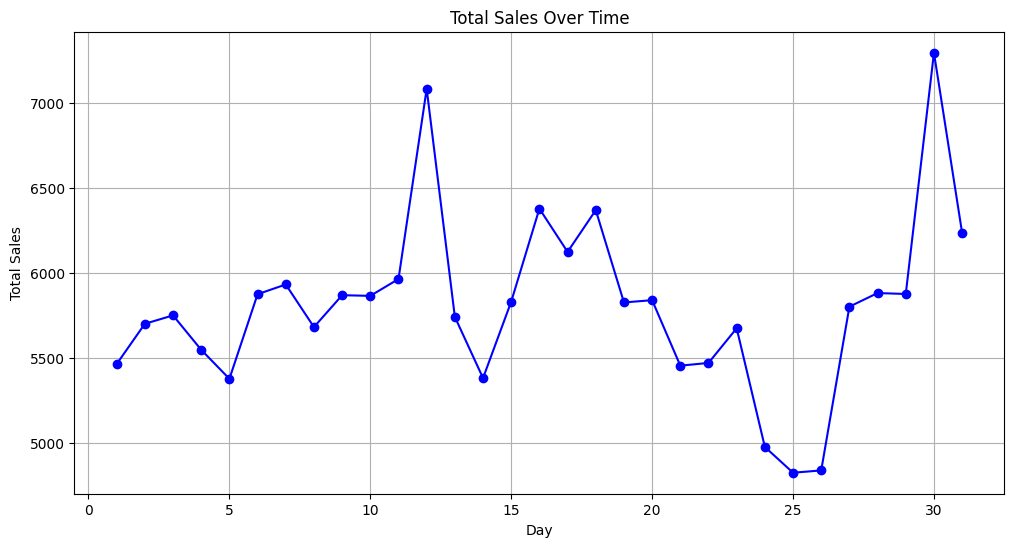

In [244]:
# Chart - 1 visualization code
# Group by date and calculate the total sales for each date
sales_by_day = final1.groupby('Day')['Sales'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(sales_by_day['Day'], sales_by_day['Sales'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

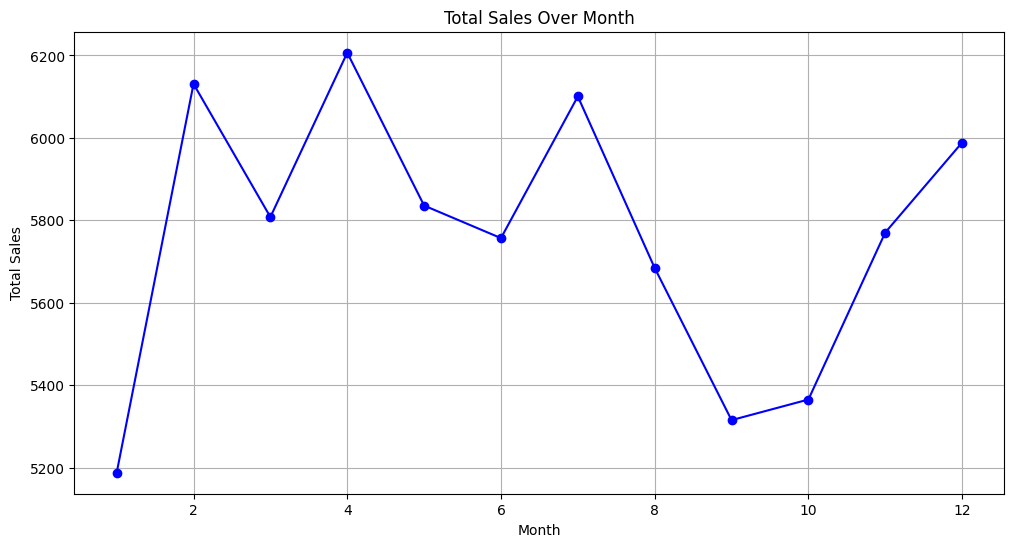

In [245]:
# Group by date and calculate the total sales for each date
sales_by_Month = final1.groupby('Month')['Sales'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(sales_by_Month['Month'], sales_by_Month['Sales'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

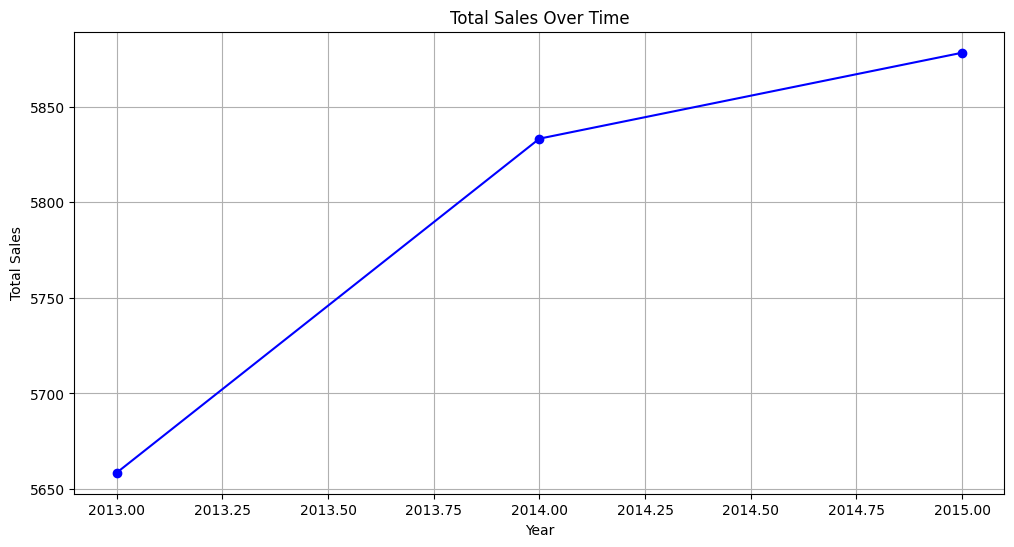

In [246]:
sales_by_Year = final1.groupby('Year')['Sales'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(sales_by_Year['Year'], sales_by_Year['Sales'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Line charts best suited to visualise trends in data with respect to time.

##### 2. What is/are the insight(s) found from the chart?

1) Average value of sales in day of week reduces with day of week.

2) Average value of sales in day of month is lowest at 25th day of month and highest at 30th day of month.

3) Average value of sales over month of year is lowest in 1st and 10th month and highest in 4th month.

4) Thare is not enough yearly data to show trends across years.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insightes can positively help business by knowing which days and month have higher average sales, stores can maintain available stock accordingly.

#### Chart - 2 - Bar Charts - Number of promotions on different store types

  StoreType  Store
0         a    602
1         b     17
2         c    148
3         d    348


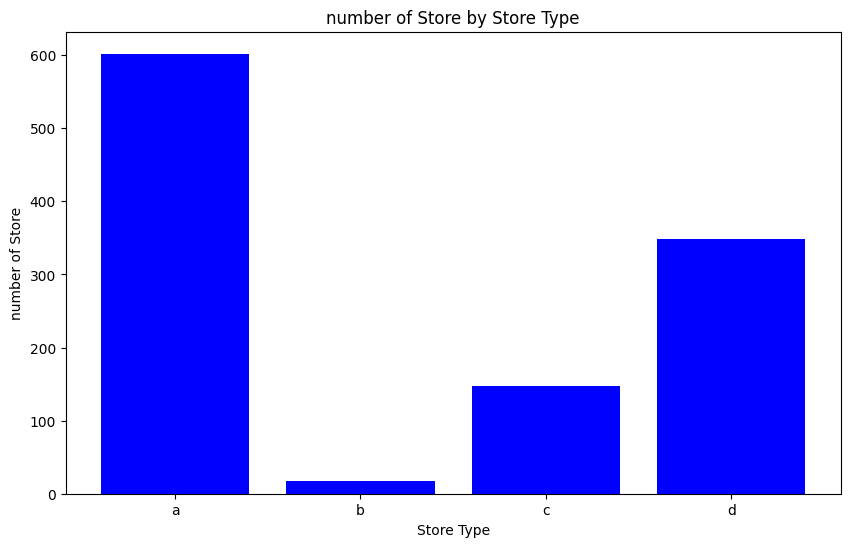

In [247]:
# Group by 'StoreType' and calculate average number of Store
store_count_by_storetype = store_df.groupby('StoreType')['Store'].count().reset_index()
print(store_count_by_storetype)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(store_count_by_storetype['StoreType'], store_count_by_storetype['Store'], color='blue')
plt.xlabel('Store Type')
plt.ylabel('number of Store')
plt.title('number of Store by Store Type')
plt.show()

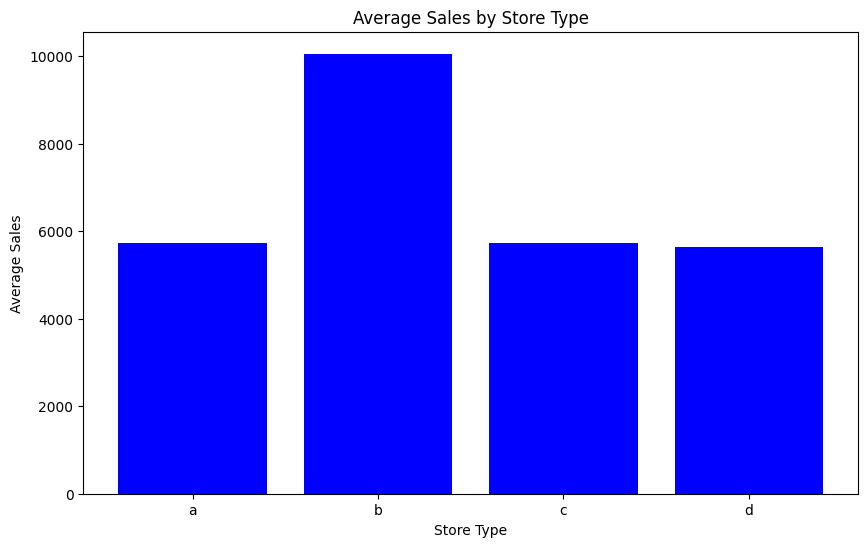

In [248]:
# Chart - 2 visualization code
# Group by 'StoreType' and calculate average sales
average_sales_by_storetype = final1.groupby('StoreType')['Sales'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_sales_by_storetype['StoreType'], average_sales_by_storetype['Sales'], color='blue')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Store Type')
plt.show()

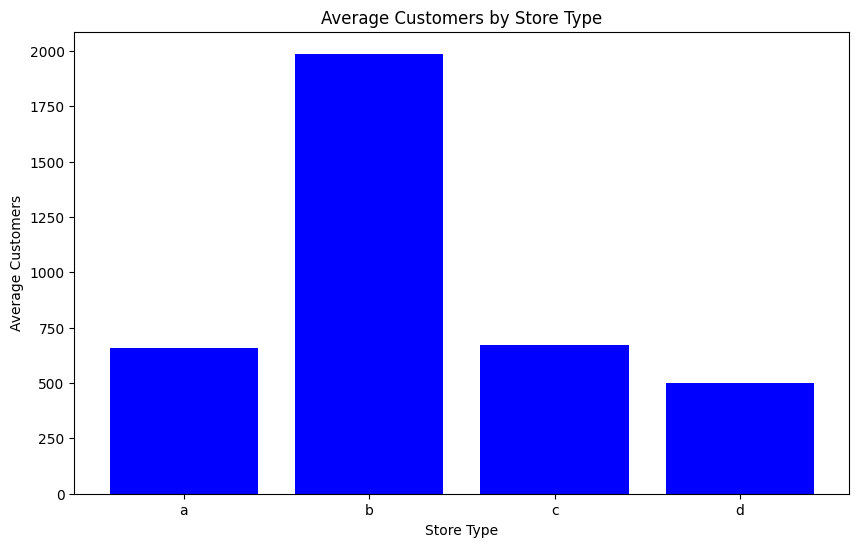

In [249]:
# Group by 'StoreType' and calculate average Customers
average_Customers_by_storetype = final1.groupby('StoreType')['Customers'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_Customers_by_storetype['StoreType'], average_Customers_by_storetype['Customers'], color='blue')
plt.xlabel('Store Type')
plt.ylabel('Average Customers')
plt.title('Average Customers by Store Type')
plt.show()

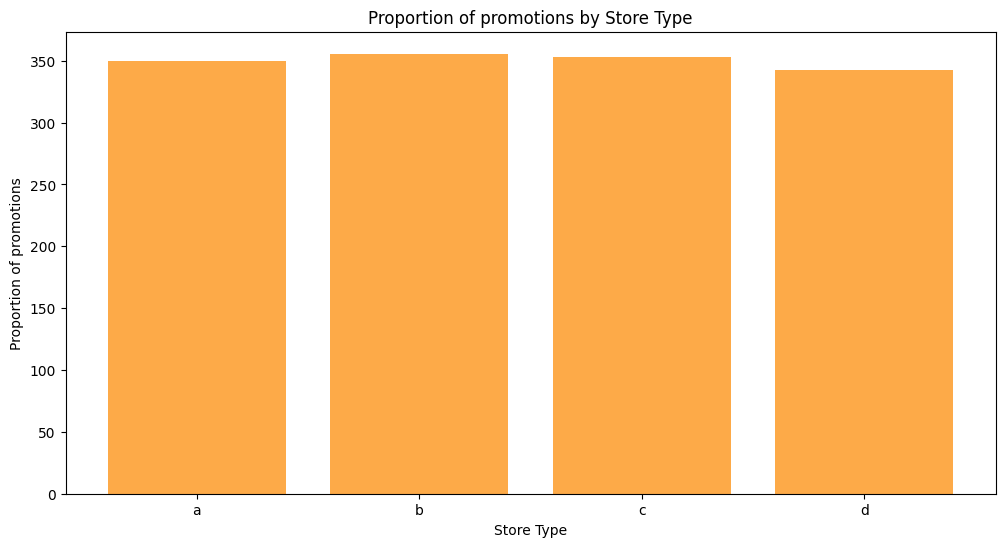

In [250]:
# Group by 'StoreType' and calculate the count of 'Promo'
promo_count_by_storetype = final1[final1['Promo'] == 1].groupby(['StoreType'])['Promo'].count().reset_index()

# Merge the two DataFrames on 'StoreType'
merged_df = pd.merge(promo_count_by_storetype, store_count_by_storetype, on='StoreType', how='left')

# Calculate the proportion of promotions for each 'StoreType'
merged_df['Proportion'] = merged_df['Promo'] / merged_df['Store']

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(merged_df['StoreType'], merged_df['Proportion'], color='xkcd:light orange')
plt.xlabel('Store Type')
plt.ylabel('Proportion of promotions')
plt.title('Proportion of promotions by Store Type')
plt.show()


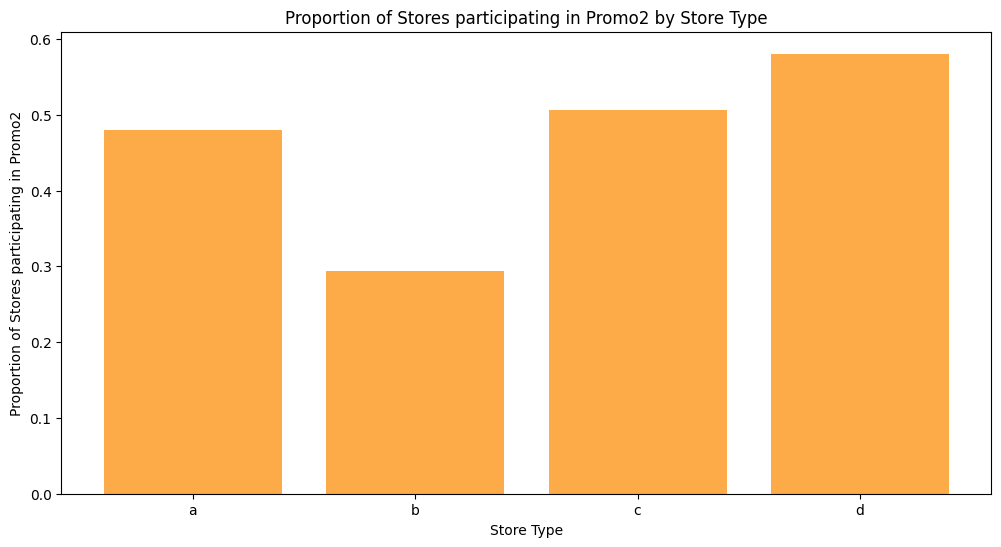

In [251]:
# Filter the DataFrame to include only rows where 'Promo2' is equal to 1
promo2_participating_stores = store_df[store_df['Promo2'] == 1]

# Group by 'StoreType' and count the number of stores participating in Promo2
promo2_count_by_storetype = promo2_participating_stores.groupby('StoreType').size().reset_index(name='Count')

# Count of total stores for each 'StoreType'
store_count_by_storetype = store_df.groupby('StoreType')['Store'].count().reset_index()

# Merge the two DataFrames on 'StoreType'
merged_df = pd.merge(promo2_count_by_storetype, store_count_by_storetype, on='StoreType', how='left')

# Calculate the proportion of stores participating in Promo2 for each 'StoreType'
merged_df['Proportion'] = merged_df['Count'] / merged_df['Store']

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(merged_df['StoreType'], merged_df['Proportion'], color='xkcd:light orange')
plt.xlabel('Store Type')
plt.ylabel('Proportion of Stores participating in Promo2')
plt.title('Proportion of Stores participating in Promo2 by Store Type')
plt.show()

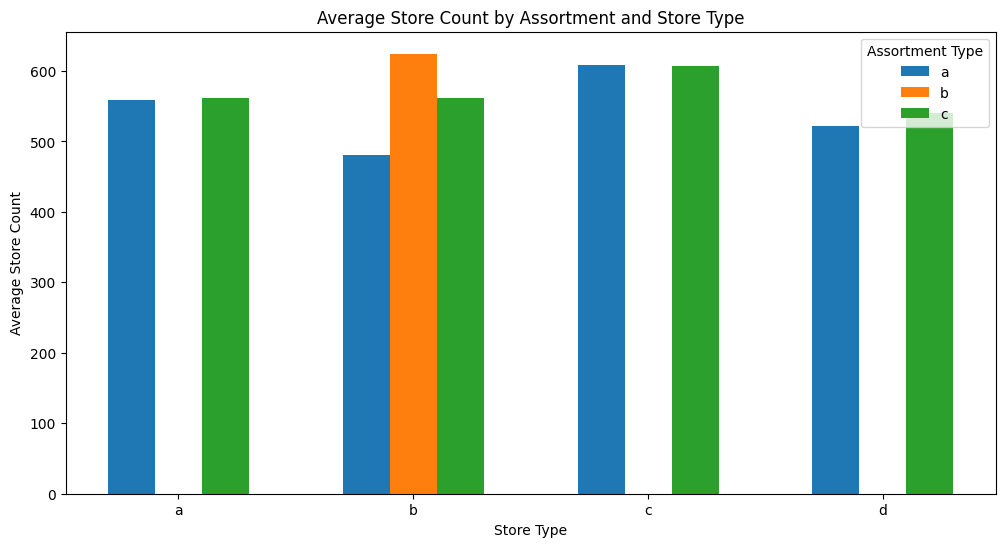

In [252]:
# Group by 'Assortment' and 'StoreType' and calculate average store count
store_count_by_assortment_and_type = store_df.groupby(['Assortment', 'StoreType'])['Store'].mean().reset_index()

# Pivot the DataFrame to have 'Assortment' as columns
pivot_df = store_count_by_assortment_and_type.pivot(index='StoreType', columns='Assortment', values='Store')

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
width = 0.2  # Width of each bar
x_values = np.arange(len(pivot_df.index))

for i, assortment_type in enumerate(pivot_df.columns):
    plt.bar(x_values + i * width, pivot_df[assortment_type], width=width, label=assortment_type)

plt.xlabel('Store Type')
plt.ylabel('Average Store Count')
plt.title('Average Store Count by Assortment and Store Type')
plt.xticks(x_values + width, pivot_df.index)
plt.legend(title='Assortment Type')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are excellent for comparing the values of different categories or groups. ar charts are simple and easy to understand. They provide a clear visual representation of data without the complexity of other chart types.

##### 2. What is/are the insight(s) found from the chart?

1) There are lowest number of stores for store type b while store type a has highest number of stores.

2) Average number of sales and customers are highest for store b while store d has lowest average sales and number of customers.

3) On an average per store per day promotions run by all storetype is near about same.

4) Store type b has highest average consecutive promotion participation rate while store type b has lowest one.

5) Stores with storetype b is only one type having assortment type b. Storetype c has highest average number of assortment types a and c

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insightes can help business, It seems that storetype b has highest average of sales and number of customers.

Reason behind it might be the availbility of assortment type b in those stores. So business can consider increasing the number of assortment type b for all stores to increase sales.

Also contribution of promotions in increasing sales is not much significant hence stores can reconsider about promotions and offers.

#### Chart - 3 - Pie Charts - Effect of Assortment types on sales and number of customers

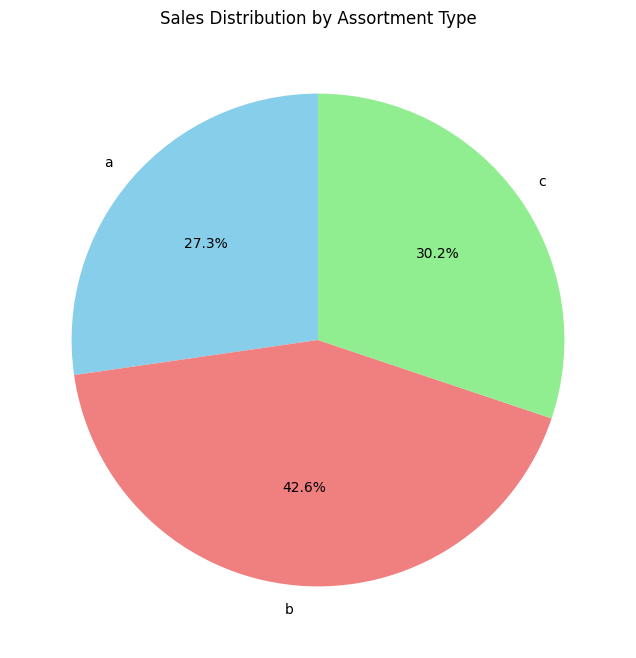

In [253]:
# Chart - 3 visualization code
assortment_sales = final1.groupby('Assortment')['Sales'].mean().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(assortment_sales['Sales'], labels=assortment_sales['Assortment'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Sales Distribution by Assortment Type')
plt.show()

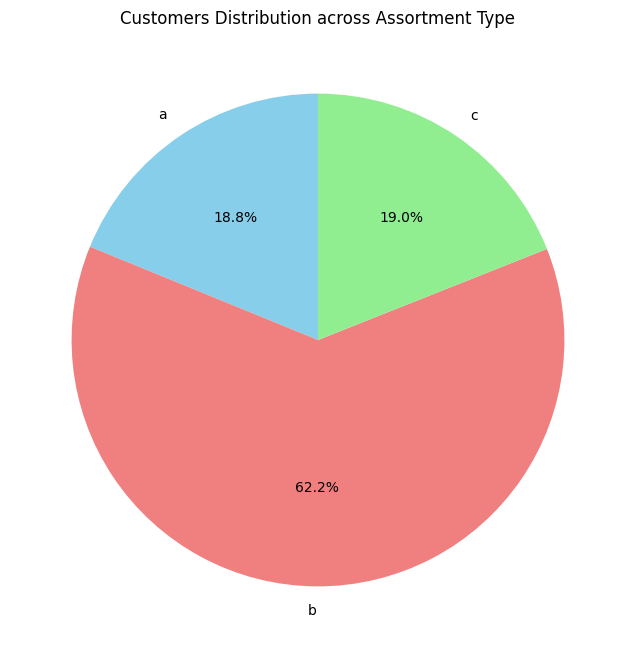

In [254]:
# Plot pie chart
assortment_Customers = final1.groupby('Assortment')['Customers'].mean().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(assortment_Customers['Customers'], labels=assortment_Customers['Assortment'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Customers Distribution across Assortment Type')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are effective for illustrating the proportion of each category relative to the whole. The entire pie represents 100%, and each slice represents a percentage of the total.

##### 2. What is/are the insight(s) found from the chart?

As concluded previously,

1) Assortment type b(Extra) has highest average sales.while other two categories have approximately same contribution in overall average sales.

2) Assortment type b(Extra) has attracts higher number of customers on an average.while other two categories have approximately same contribution in overall customers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Assortment b(Extra) seems to be have either shortage of suppky or higher demand. Store could consider this type of assortment in their stores.

#### Chart - 4 - Donut Charts - Effect of state and school holiday on sales and number of customers

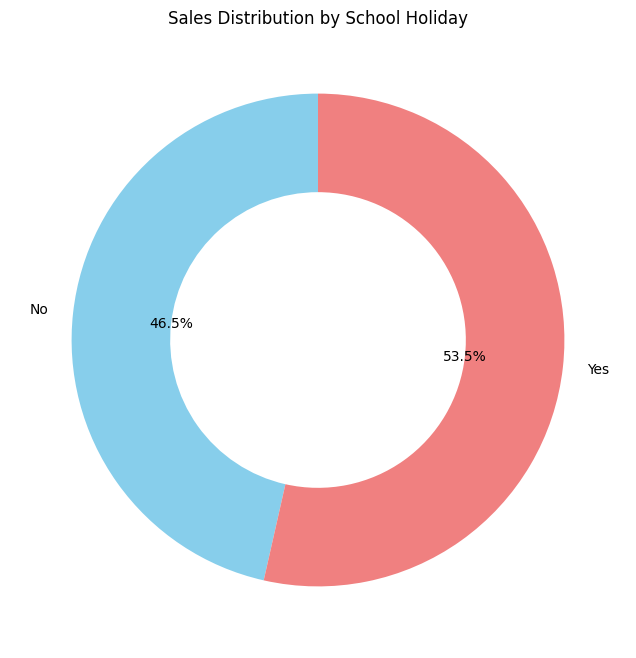

In [255]:
# Chart - 4 visualization code
school_holiday_sales = final1.groupby('SchoolHoliday')['Sales'].mean().reset_index()

# Plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(school_holiday_sales['Sales'], labels=school_holiday_sales['SchoolHoliday'].map({0: 'No', 1: 'Yes'}), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.4))
plt.title('Sales Distribution by School Holiday')
plt.show()

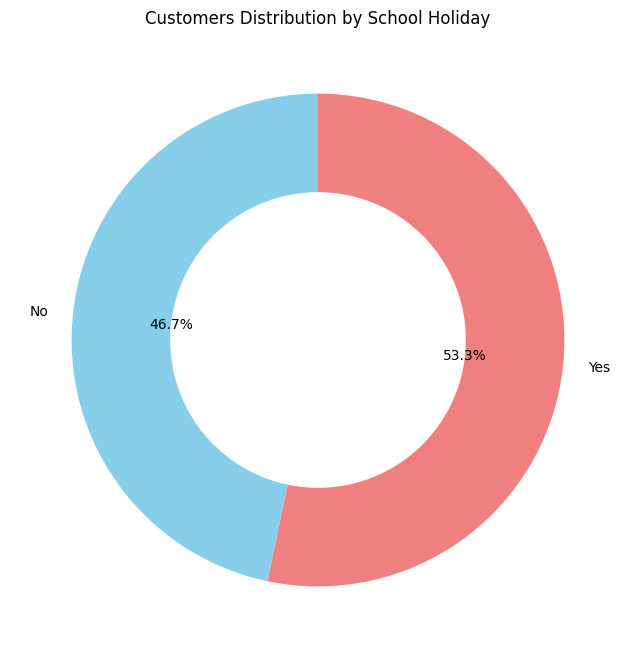

In [256]:
# Chart - 4 visualization code
school_holiday_Customers = final1.groupby('SchoolHoliday')['Customers'].mean().reset_index()

# Plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(school_holiday_Customers['Customers'], labels=school_holiday_Customers['SchoolHoliday'].map({0: 'No', 1: 'Yes'}), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.4))
plt.title('Customers Distribution by School Holiday')
plt.show()

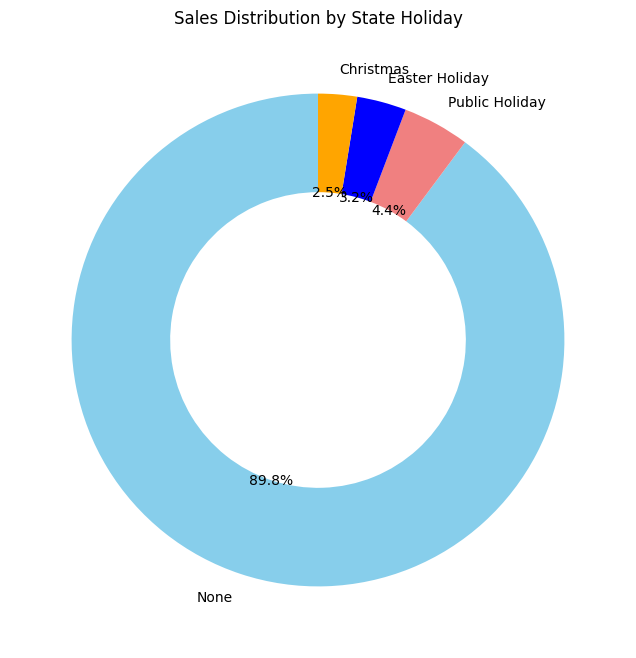

In [257]:
# Chart - 4 visualization code
State_holiday_sales = final1.groupby('StateHoliday')['Sales'].mean().reset_index()

# Plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(State_holiday_sales['Sales'], labels=State_holiday_sales['StateHoliday'].map({'0': 'None', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c':'Christmas'}), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'blue','orange'], wedgeprops=dict(width=0.4))
plt.title('Sales Distribution by State Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

Similar to a pie chart, but with a hole in the center.
Donut charts are an alternative to pie charts and can be used to emphasize the overall proportion while allowing for additional information in the center.

##### 2. What is/are the insight(s) found from the chart?

1) There are slightly higher average sales on school holidays.

2) Sales are highest when there are no holiday or on working days. there are small amount of sales on holidays which may be because few stores were open on those days.In general all stores remain closed on holiday hence stores have highest sales on working days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, School holidays have higher sales this may be because on weekends schools remain closed but most of the stores are open hence because of which sales might me higher. Store managers can consider keeping store open on weekends to boost sales.

#### Chart - 5- Stacked Bar Charts - Effect of Number of promo on sales and number of customers

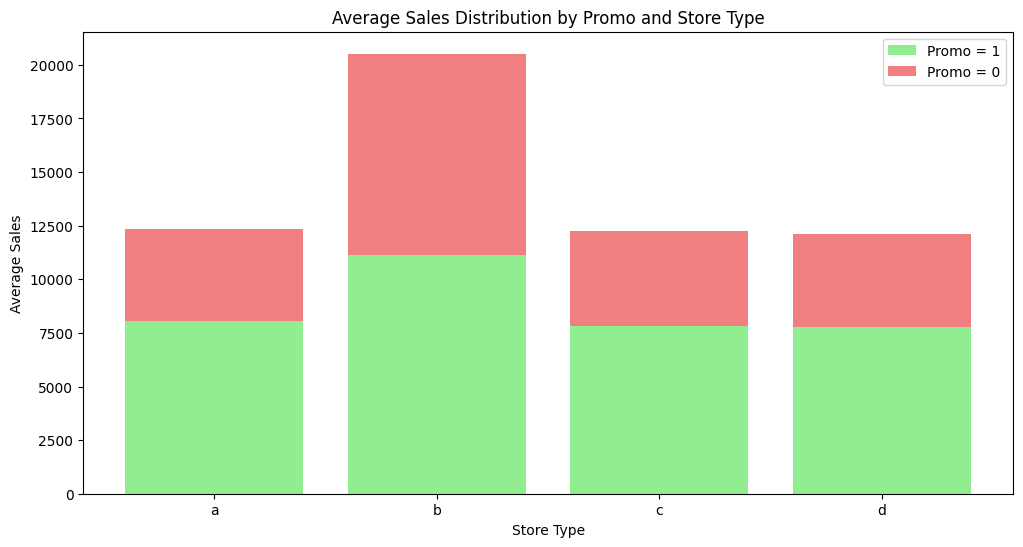

In [258]:
# Chart - 5 visualization code
promo_sales_by_storetype = final1.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack().reset_index()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(promo_sales_by_storetype['StoreType'], promo_sales_by_storetype[1], color='lightgreen', label='Promo = 1')
plt.bar(promo_sales_by_storetype['StoreType'], promo_sales_by_storetype[0], color='lightcoral', label='Promo = 0', bottom=promo_sales_by_storetype[1])
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.title('Average Sales Distribution by Promo and Store Type')
plt.legend()
plt.show()

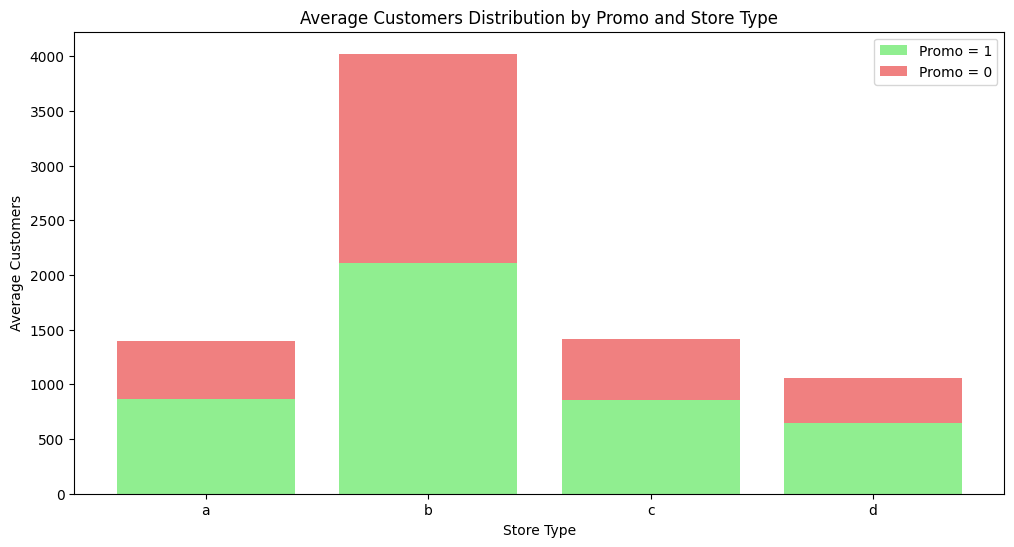

In [259]:
# modify below code for Customers column

promo_customers_by_storetype = final1.groupby(['StoreType', 'Promo'])['Customers'].mean().unstack().reset_index()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(promo_customers_by_storetype['StoreType'], promo_customers_by_storetype[1], color='lightgreen', label='Promo = 1')
plt.bar(promo_customers_by_storetype['StoreType'], promo_customers_by_storetype[0], color='lightcoral', label='Promo = 0', bottom=promo_customers_by_storetype[1])
plt.xlabel('Store Type')
plt.ylabel('Average Customers')
plt.title('Average Customers Distribution by Promo and Store Type')
plt.legend()
plt.show()


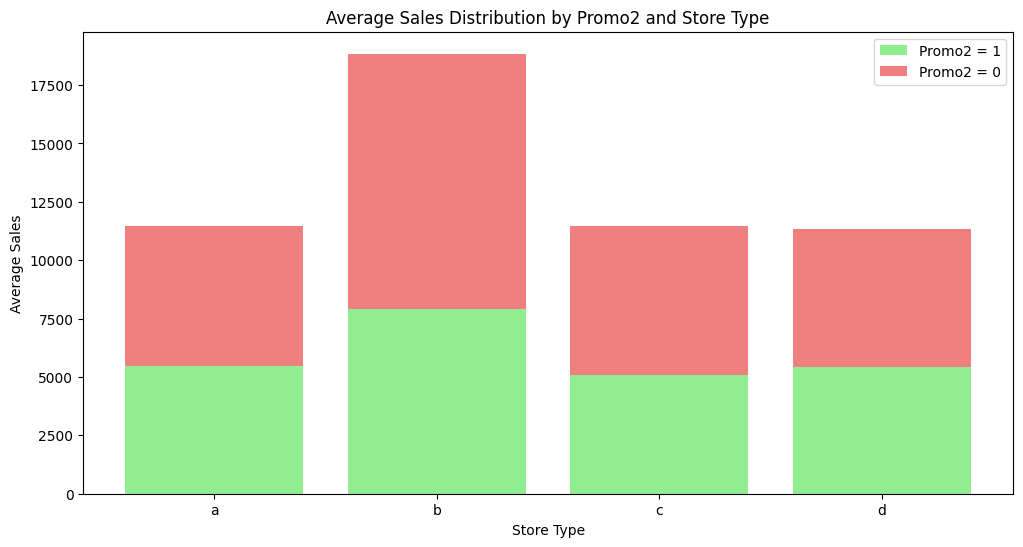

In [260]:
promo2_sales_by_storetype = final1.groupby(['StoreType', 'Promo2'])['Sales'].mean().unstack().reset_index()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(promo2_sales_by_storetype['StoreType'], promo2_sales_by_storetype[1], color='lightgreen', label='Promo2 = 1')
plt.bar(promo2_sales_by_storetype['StoreType'], promo2_sales_by_storetype[0], color='lightcoral', label='Promo2 = 0', bottom=promo2_sales_by_storetype[1])
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.title('Average Sales Distribution by Promo2 and Store Type')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Stacked bar charts are effective for illustrating the composition of a whole in terms of its parts. Each bar represents the total, and the segments within the bar represent the contribution of each sub-category to that total.

##### 2. What is/are the insight(s) found from the chart?

1) Stores who run promotions have higher sales and numner of customers compared to stores who do not run.

2) Stores who participate in consecutive promotions have not significant effect compared to stores who do not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Running regular promotions might be helpful for business but participating in consecutive promotions(promo2) is not significantly useful.

#### Chart - 6 - Histogram - Effect of Competition open since time on sales and customers

In [261]:
# Chart - 6 visualization code
# Chart - 6 -  Effect of Competition open since Month
# Step 1: Aggregate Sales by Store
store_totals = final1.groupby('Store')['Sales'].mean().reset_index(name='AverageSales')

# Step 2: Identify the Store with Maximum Sales
store_with_max_sales = store_totals.loc[store_totals['AverageSales'].idxmax(), 'Store']

# Display the store with maximum sales
print(f"Store with maximum average sales: {store_with_max_sales}")

# Step 3: Filter Data for the Store with Maximum Sales
data_for_max_sales_store = final1[final1['Store'] == store_with_max_sales]

# Display the data for the store with maximum sales
print("Data for the store with maximum average sales:")
print(data_for_max_sales_store['Store'].values[0])

Store with maximum average sales: 262
Data for the store with maximum average sales:
262


Considering sales data of store which has highest average sales for analysis.

CompetitionOpenSinceMonth for Store 262: 5.0
CompetitionOpenSinceYear for Store 262: 2013.0
Competitiondistance for Store 262: 1180.0


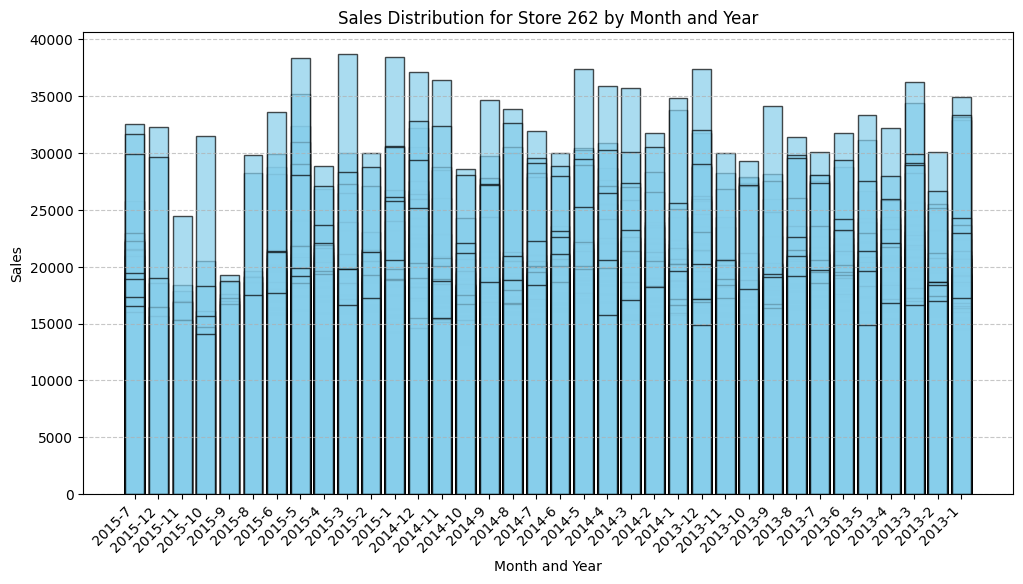

In [262]:
data_for_store_262 = final1[final1['Store'] == 262].copy()

# Combine 'Month' and 'Year' into a single 'Month_Year' column
data_for_store_262['Month_Year'] = data_for_store_262['Year'].astype(str) + '-' + data_for_store_262['Month'].astype(str)

# Extract unique values for 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear'
competition_open_month = data_for_store_262['CompetitionOpenSinceMonth'].unique()[0]
competition_open_year = data_for_store_262['CompetitionOpenSinceYear'].unique()[0]
competition_distance = data_for_store_262['CompetitionDistance'].unique()[0]

# Print the values
print(f"CompetitionOpenSinceMonth for Store 262: {competition_open_month}")
print(f"CompetitionOpenSinceYear for Store 262: {competition_open_year}")
print(f"Competitiondistance for Store 262: {competition_distance}")

# Generate Histogram
plt.figure(figsize=(12, 6))
plt.bar(data_for_store_262['Month_Year'], data_for_store_262['Sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sales Distribution for Store 262 by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

CompetitionOpenSinceMonth for Store 262: 5.0
CompetitionOpenSinceYear for Store 262: 2013.0
Competitiondistance for Store 262: 1180.0


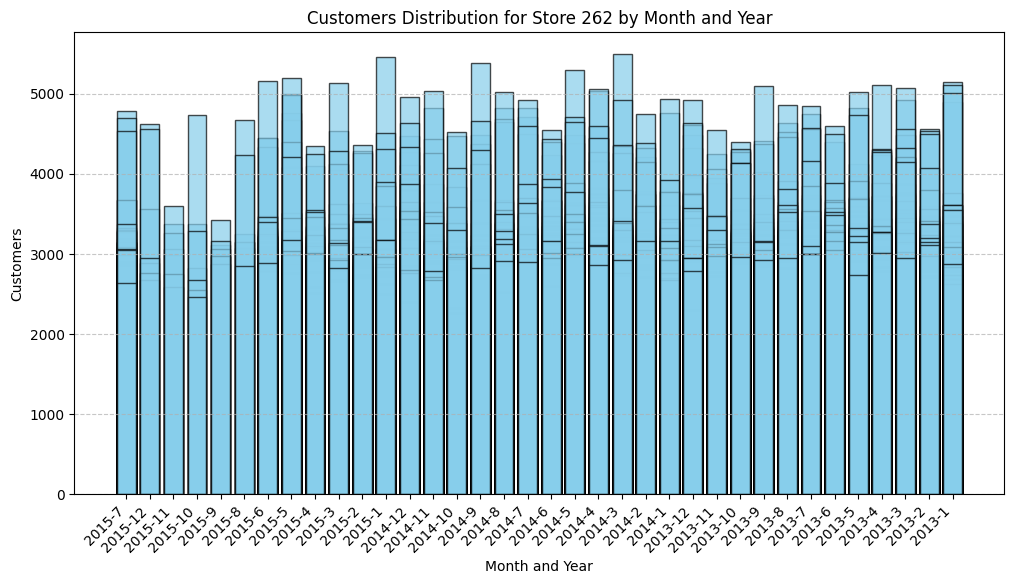

In [263]:
# Filter data for Store == 262 and create a copy
data_for_store_262 = final1[final1['Store'] == 262].copy()

# Combine 'Month' and 'Year' into a single 'Month_Year' column
data_for_store_262['Month_Year'] = data_for_store_262['Year'].astype(str) + '-' + data_for_store_262['Month'].astype(str)

# Extract unique values for 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', and 'CompetitionDistance'
competition_open_month = data_for_store_262['CompetitionOpenSinceMonth'].unique()[0]
competition_open_year = data_for_store_262['CompetitionOpenSinceYear'].unique()[0]
competition_distance = data_for_store_262['CompetitionDistance'].unique()[0]

# Print the values
print(f"CompetitionOpenSinceMonth for Store 262: {competition_open_month}")
print(f"CompetitionOpenSinceYear for Store 262: {competition_open_year}")
print(f"Competitiondistance for Store 262: {competition_distance}")

# Generate Histogram for 'Customers' column
plt.figure(figsize=(12, 6))
plt.bar(data_for_store_262['Month_Year'], data_for_store_262['Customers'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Customers Distribution for Store 262 by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Histograms provide a visual summary of the distribution of a dataset. Histograms help in identifying patterns or trends within the data, such as modes (peaks), symmetry, skewness, and outliers.

##### 2. What is/are the insight(s) found from the chart?

1) Competition for store 262 opened in 5th month of 2013 and there is slight customer sales decrease in that moth and in subsequent 2 months but on average there is no significant difference in sales and customers by Competition.

**Note - Store 262 is choosen because it has highest average sales across all stores.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, This data might no much useful to business.

#### Chart - 7 - Violin Plot - Effect of promo interval on sales and customers

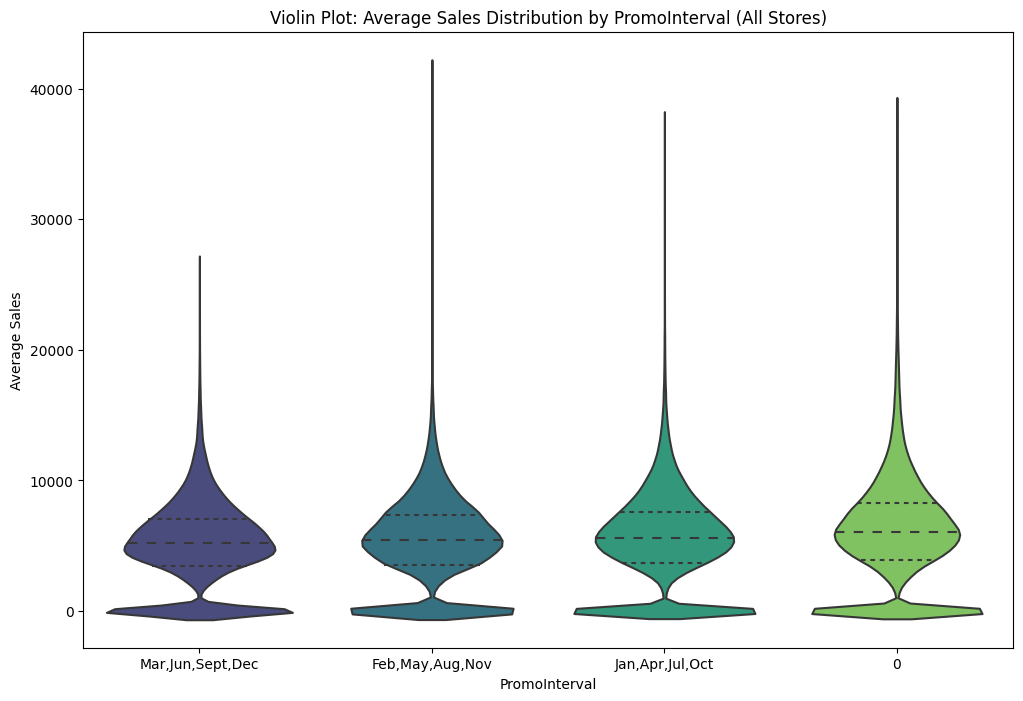

In [264]:
# Chart - 7 visualization code
# Calculate mean Sales for each PromoInterval
mean_sales_by_promo = final1.groupby('PromoInterval')['Sales'].mean().reset_index()

# Create Violin Plot using mean Sales
plt.figure(figsize=(12, 8))
sns.violinplot(x='PromoInterval', y='Sales', data=final1, palette='viridis', inner='quartile', order=mean_sales_by_promo.sort_values('Sales')['PromoInterval'])

plt.title('Violin Plot: Average Sales Distribution by PromoInterval (All Stores)')
plt.xlabel('PromoInterval')
plt.ylabel('Average Sales')

# Show the plot
plt.show()

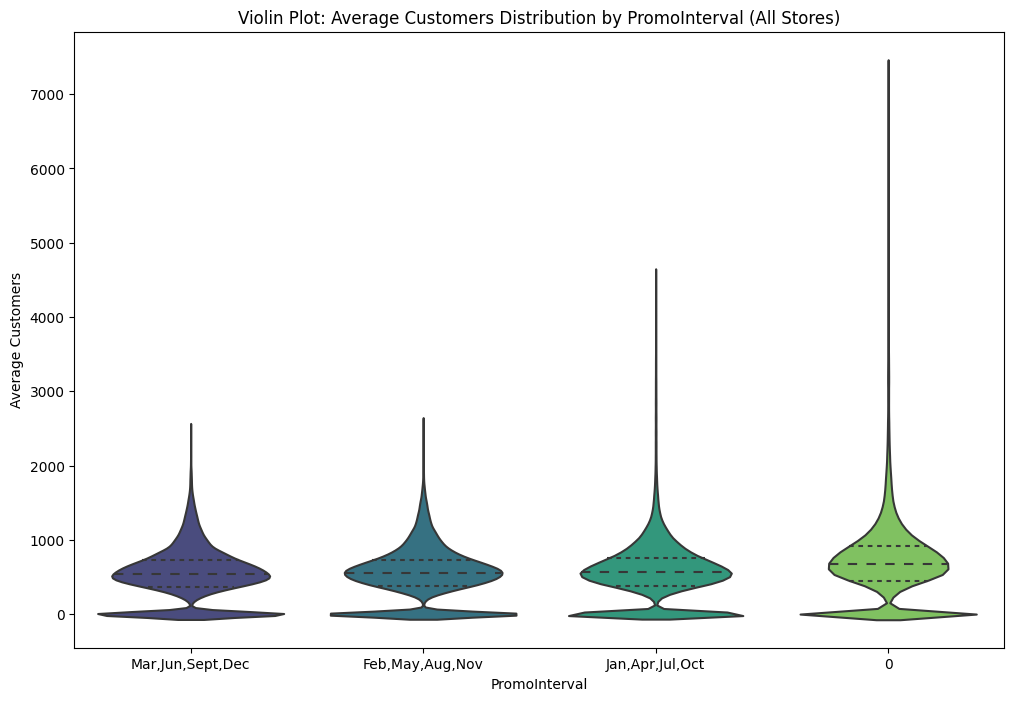

In [265]:
# Calculate mean Customers for each PromoInterval
mean_customers_by_promo = final1.groupby('PromoInterval')['Customers'].mean().reset_index()

# Create Violin Plot using mean Customers
plt.figure(figsize=(12, 8))
sns.violinplot(x='PromoInterval', y='Customers', data=final1, palette='viridis', inner='quartile', order=mean_customers_by_promo.sort_values('Customers')['PromoInterval'])

plt.title('Violin Plot: Average Customers Distribution by PromoInterval (All Stores)')
plt.xlabel('PromoInterval')
plt.ylabel('Average Customers')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots are useful for visualizing the distribution of a continuous variable across different categories or groups. Violin plots make it easy to compare the distribution of a variable across different categories or groups.
Each category is represented by its own violin, allowing for visual comparison of shapes, widths, and medians.


##### 2. What is/are the insight(s) found from the chart?

1) On average promo run on Feb,May,Aug,Nov yeilds better yield, as more number of visting customers converts to purchasing customers hence average Sales are higher in Feb,May,Aug,Nov and average number of customer is lowest it shows high conversion rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Promo2 collectively are already not significantly effective but running them on interval of Feb,May,Ayg,Nov yields better Sales.

#### Chart - 8

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [266]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [267]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [268]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [269]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [270]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-271-d5ac9af15320>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final1.corr()


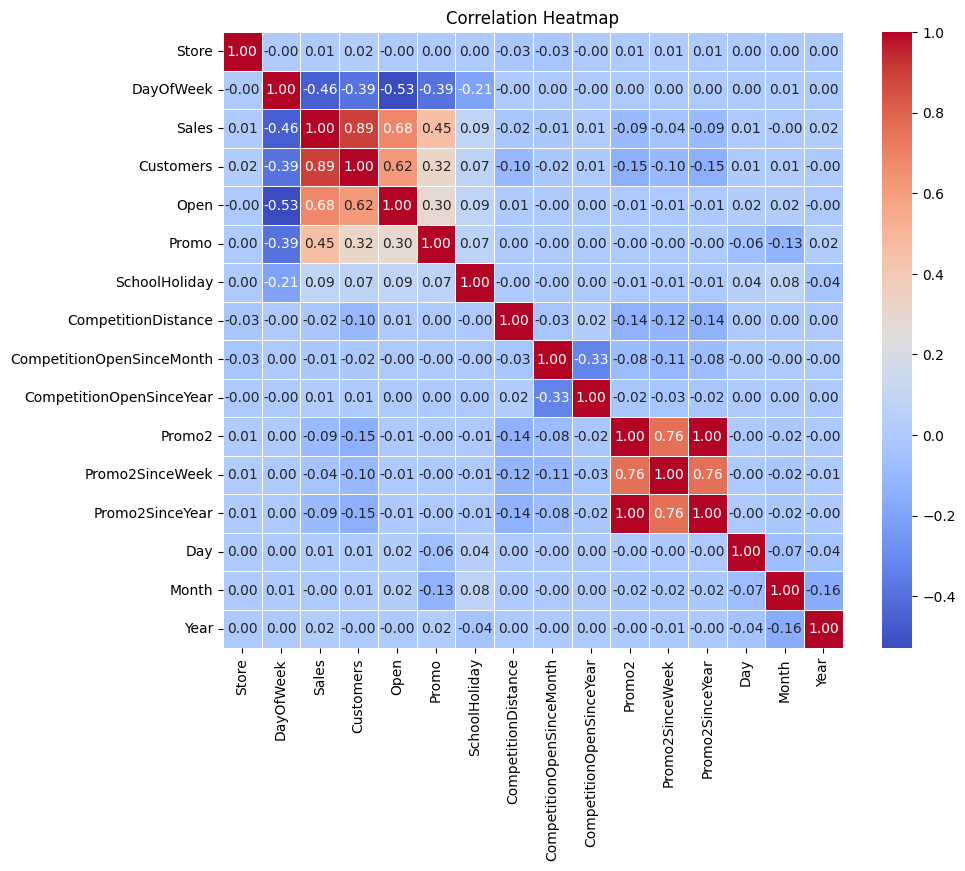

In [271]:
# Correlation Heatmap visualization code
correlation_matrix = final1.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model.

##### 2. What is/are the insight(s) found from the chart?

Promo, Open, Customers have positive correlation with Sales.DayofWeek has negetive correlation with Sales. Sinilar trend can be observed in case of Customers.

#### Chart - 15 - Pair Plot

In [272]:
# Pair Plot visualization code
# Create pair plots for each StoreType

#sns.pairplot(final1, hue='StoreType', markers='o', palette='viridis')
#plt.suptitle(f'Pair Plot for StoreType', y=1.02)
#plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [273]:
final1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: The coefficients of the regression model are equal to zero, implying that there is no relationship between past sales data and future sales.

**Alternative Hypothesis (H1)**: At least one coefficient is not equal to zero, suggesting that past sales data can predict future sales.

#### 2. Perform an appropriate statistical test.

In [274]:
# Perform Statistical Test to obtain P-Value
final1['Date'] = pd.to_datetime(final1['Date'])

# Sort the DataFrame by the 'Date' column
final1_sorted = final1.sort_values('Date')

# Set the date to split the data
split_date = pd.to_datetime('01-08-2015')

# Split the data into training and testing sets
train_data = final1_sorted[final1_sorted['Date'] < split_date]
test_data = final1_sorted[final1_sorted['Date'] >= split_date]

# Extracting X and y from the training set
X_train = train_data[['Customers', 'Open', 'Promo', 'SchoolHoliday']]
y_train = train_data['Sales']

# Extracting X and y from the testing set
X_test = test_data[['Customers', 'Open', 'Promo', 'SchoolHoliday']]
y_test = test_data['Sales']

In [275]:
# Add a constant term to the independent variables matrix for training set
X_train = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary statistics
summary = print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 1.163e+06
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:57:11   Log-Likelihood:            -6.8729e+06
No. Observations:              788634   AIC:                         1.375e+07
Df Residuals:                  788629   BIC:                         1.375e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -92.4439      4.022    -22.987

P value for this test is 0 which strongly suggests that at least one predictor variable is contributing significantly to explaining the variability in the dependent variable. Hence Null hypothesis can be rejected.

##### Which statistical test have you done to obtain P-Value?

The F-statistic is used test hypothesis.

##### Why did you choose the specific statistical test?

The F-statistic assesses whether the overall regression model is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no significant seasonal variation in retail sales on a yearly basis.

**Alternative Hypothesis (H1)**: There is a significant seasonal variation in retail sales on a yearly basis.

#### 2. Perform an appropriate statistical test.

In [276]:
final1_copy = final1.copy()

In [277]:
# Perform Statistical Test to obtain P-Value
final1_copy['Date'] = pd.to_datetime(final1_copy['Date'])
final1_copy.set_index('Date', inplace=True)

# Perform KPSS test
result_kpss = kpss(final1['Sales'])

# Print the test statistic and p-value
print(f'Test Statistic: {result_kpss[0]}')
print(f'P-value: {result_kpss[1]}')

Test Statistic: 0.7011624739492143
P-value: 0.013439775095525974


P- Value is significantly lower than significance level of 0.05, it suggests there is a significant seasonal variation in retail sales on a yearly basis. Hence Null hypothesis can be rejected.

##### Which statistical test have you done to obtain P-Value?

 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is used to obtain P-Value

##### Why did you choose the specific statistical test?

The KPSS test is used to check for stationarity around a deterministic trend.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no correlation between participating in Promo2 and sales.

**Alternative Hypothesis (H1)**: There is a correlation between participating in Promo2 and sales.

#### 2. Perform an appropriate statistical test.

In [278]:
# Perform Statistical Test to obtain P-Value
correlation, p_value = stats.pointbiserialr(final1['Promo2'], final1['Sales'])

# Print the correlation coefficient and p-value
print(f'Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

# Compare the p-value to a significance level (e.g., 0.05)
if p_value <= 0.05:
    print('Reject the null hypothesis. There is evidence of a significant correlation.')
else:
    print('Fail to reject the null hypothesis. There may not be a significant correlation.')

Correlation Coefficient: -0.09103964725797134
P-value: 0.0
Reject the null hypothesis. There is evidence of a significant correlation.


##### Which statistical test have you done to obtain P-Value?

To test the hypothesis that participating in Promo2 has a positive correlation with sales,correlation test is used.

##### Why did you choose the specific statistical test?

The correlation coefficient measures the strength and direction of a linear relationship between two variables. In this case, we are interested in the correlation between the 'Promo2' column (binary) and the 'Sales' column.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [279]:
# Handling Missing Values & Missing Value Imputation
final1.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Month                        0
Year                         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no mjssing values in dataset as they are imputed already before EDA.

### 2. Handling Outliers

Outliers are already handled before  EDA.

In [280]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [281]:
# Encode your categorical columns
print(final1['StoreType'].unique())
print(final1['Assortment'].unique())
print(final1['PromoInterval'].unique())

['c' 'a' 'd' 'b']
['a' 'c' 'b']
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [282]:
# Map above symbols with numeric values.

final1['StoreType']    = final1['StoreType'].map({'a':2,'b':3,'c':4,'d':5})
final1['Assortment']   = final1['Assortment'].map({'a':2, 'c':4,'b':3})
final1['PromoInterval'] = final1['PromoInterval'].map({'Jan,Apr,Jul,Oct': 2, 'Feb,May,Aug,Nov': 3, 'Mar,Jun,Sept,Dec': 4, 0: 0})

#### What all categorical encoding techniques have you used & why did you use those techniques?

Ordinal Encoding technique is used to encode all categorical variables. For above three variables we can observe order or ranking and Ordinal encoder assigns numerical values to categories based on their order.
Useful for ordinal data with a clear ranking.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [283]:
# Expand Contraction

#### 2. Lower Casing

In [284]:
# Lower Casing

#### 3. Removing Punctuations

In [285]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [286]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [287]:
# Remove Stopwords

In [288]:
# Remove White spaces

#### 6. Rephrase Text

In [289]:
# Rephrase Text

#### 7. Tokenization

In [290]:
# Tokenization

#### 8. Text Normalization

In [291]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [292]:
# POS Taging

#### 10. Text Vectorization

In [293]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Required new features are already created in data wrangling section.

In [294]:
# Manipulate Features to minimize feature correlation and create new features
#no of observations for closed stores with 0 sales
(final1[final1.Open == 0]).shape

(172817, 21)

In [295]:
# Removing rows where store was closed hence zero sales
final1 = final1[final1['Open'] != 0]

In [296]:
# Removing open column
final1.drop('Open', axis=1, inplace=True)

<ipython-input-296-fd1b3aca88cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1.drop('Open', axis=1, inplace=True)


In [297]:
print(final1.head(1))
print(final1.shape)

   Store  DayOfWeek       Date  Sales  Customers  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555      1            0   

   SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
0              1          4           2               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  Day  Month  Year  
0              0.0              0.0              0   31      7  2015  
(844392, 20)


#### 2. Feature Selection

In [298]:
final1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [299]:
# Select your features wisely to avoid overfitting
# Variable inflation Factor for continues variables
df = pd.DataFrame(final1)

# Separate features and target variable
X = df[['Customers', 'CompetitionDistance']]
y = df['Sales']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF values:")
print(vif_data)

VIF values:
              Variable       VIF
0            Customers  1.254022
1  CompetitionDistance  1.254022


<ipython-input-300-61dc36ff5cd4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final1.corr()


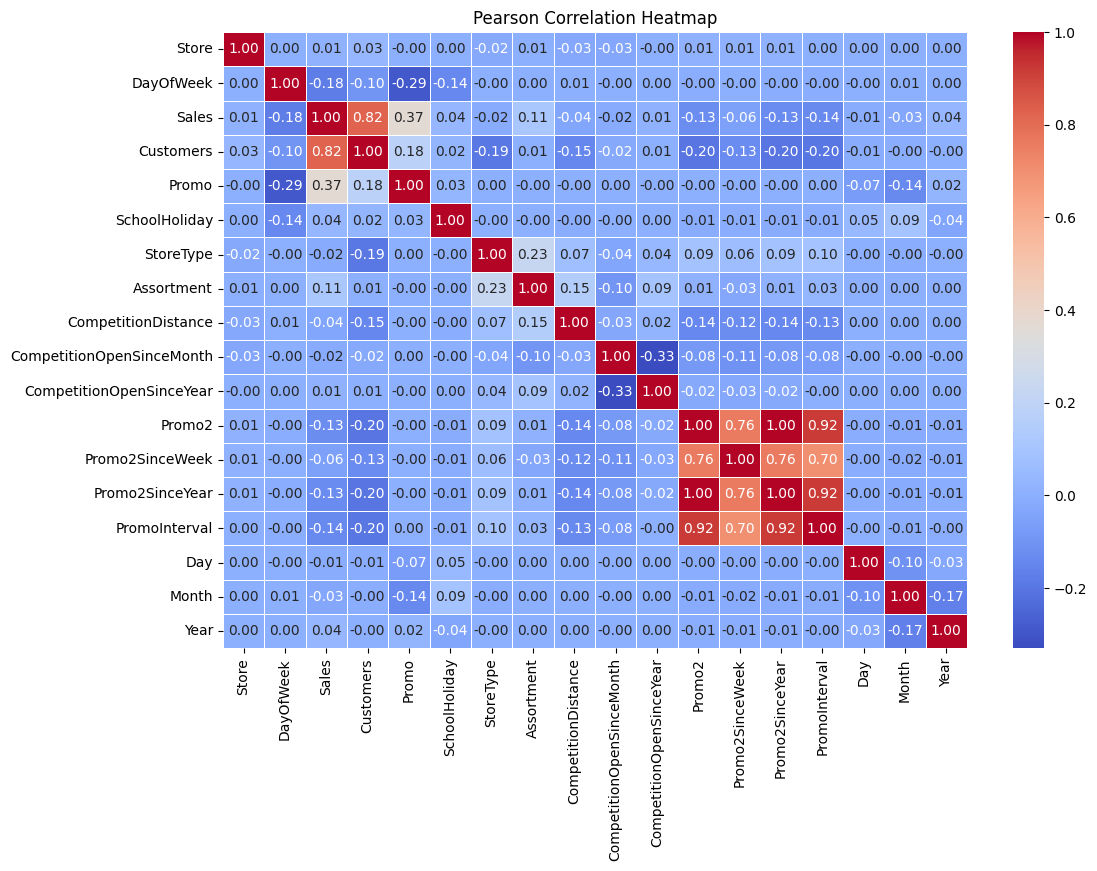

In [300]:
# Calculate correlation matrix
correlation_matrix = final1.corr()

# Visualize the correlation matrix using a heatmap with rounded values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

In [301]:
# List of columns to perform the ANOVA test on
selected_columns = ['DayOfWeek', 'StoreType', 'Assortment']

# Extract the selected columns and the target variable
selected_data = final1[selected_columns + ['Sales']]

# Perform one-way ANOVA test
anova_results = f_oneway(*[selected_data[col] for col in selected_columns])

# Print the results
print("ANOVA Results:")
print("F-statistic:", anova_results.statistic)
print("P-value:", anova_results.pvalue)


ANOVA Results:
F-statistic: 37198.39573154925
P-value: 0.0


##### What all feature selection methods have you used  and why?

Variable Inflation Factor (VIF) technique is used for feature selection because it is Useful for detecting multicollinearity among continuous variables.
Typically applied in the context of linear regression

Pearson Correlation used for continues and binary variables as it provides correlation in the form heatmaps.

Anova test was performed for categorical variables which is useful for categorical-numerical correlations.

##### Which all features you found important and why?

Customers and Sales column has correlation of 0.89 hence customers feature can be ignored from Ml model training.Also Stateholiday feature can be ignored while model training, as having closed stores there will be zero sales.Promo2 is correlated to Promo interval about 0.92 hence promointerval also can be ignored while ML model training.

Except above three features all the features can be considered for model training.

In [302]:
# Removing unnecessary columns
final1.drop('StateHoliday', axis=1, inplace=True)

In [303]:
final1.drop('Customers', axis=1, inplace=True)
final1.drop('PromoInterval', axis=1, inplace=True)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

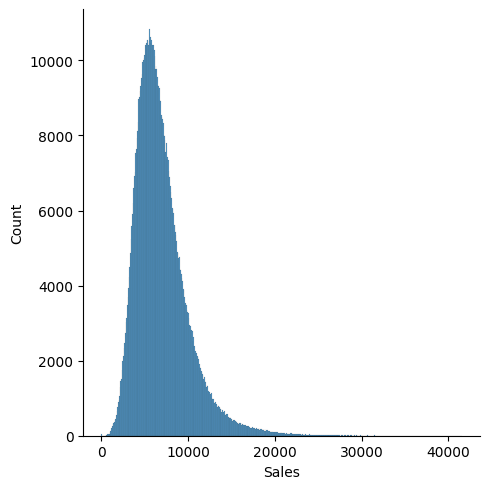

In [304]:
# Transform Your data
sns.displot(x=final1['Sales'])

In [305]:
final1['Sales'] = np.log(final1['Sales'])
final1.dropna(inplace=True)
final1.drop(final1[final1['Sales'] == float("-inf")].index,inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


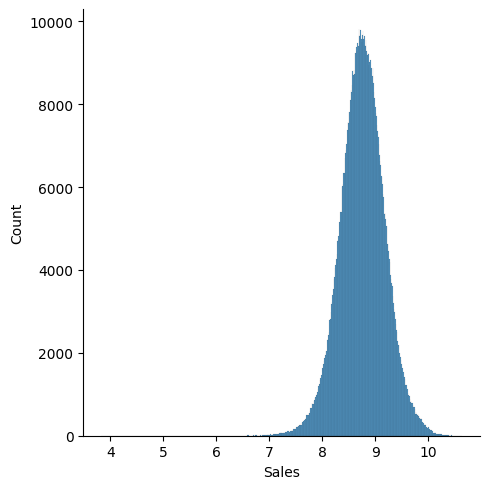

In [306]:
#distribution plot of Sales
sns.displot(x=final1['Sales'])

In [307]:
#setting date and store as index
final1.set_index(['Date','StoreType','Store'],inplace=True)
#sorting index following the time series
final1.sort_index(inplace=True)

In [309]:
#Sales should be the last col
columns=list(final1.columns)
columns.remove('Sales')
columns.append('Sales')
df1=final1[columns]

In [310]:
df1.head()

DayOfWeek  Promo  SchoolHoliday  Assortment  \
Date       StoreType Store                                                
2013-01-01 2         530            2      0              1           4   
           3         85             2      0              1           2   
                     259            2      0              1           3   
                     262            2      0              1           2   
                     274            2      0              1           3   

                            CompetitionDistance  CompetitionOpenSinceMonth  \
Date       StoreType Store                                                   
2013-01-01 2         530                18160.0                        0.0   
           3         85                  1870.0                       10.0   
                     259                  210.0                        0.0   
                     262                 1180.0                        5.0   
                     274                 3640.0                        0.0   

                            CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Date       StoreType Store                                                      
2013-01-01 2         530                      2013.0       0              0.0   
           3         85                       2011.0       0              0.0   
                     259                      2013.0       0              0.0   
                     262                      2013.0       0              0.0   
                     274                      2013.0       1             10.0   

                            Promo2SinceYear  Day  Month  Year     Sales  
Date       StoreType Store                                               
2013-01-01 2         530                0.0    1      1  2013  7.974877  
           3         85                 0.0    1      1  2013  8.347590  
                     259                0.0    1      1  2013  8.832150  
                     262                0.0    1      1  2013  9.756552  
                     274             2013.0    1      1  2013  8.039802

In [311]:
df2 = df1.copy(deep=True)

### 6. Data Scaling

In [312]:
columns_to_standardize = ['CompetitionDistance']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the specified columns
df2[columns_to_standardize] = scaler.fit_transform(df2[columns_to_standardize])

In [313]:
df2.tail()

DayOfWeek  Promo  SchoolHoliday  Assortment  \
Date       StoreType Store                                                
2015-12-07 3         1081           7      0              0           2   
                     1097           7      0              0           3   
           5         299            7      0              0           4   
                     578            7      0              0           2   
                     867            7      0              0           4   

                            CompetitionDistance  CompetitionOpenSinceMonth  \
Date       StoreType Store                                                   
2015-12-07 3         1081             -0.646307                        3.0   
                     1097             -0.605304                        3.0   
           5         299               4.252223                        9.0   
                     578               0.929731                        4.0   
                     867               2.097024                        9.0   

                            CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Date       StoreType Store                                                      
2015-12-07 3         1081                     2006.0       0              0.0   
                     1097                     2002.0       0              0.0   
           5         299                      2012.0       0              0.0   
                     578                      2013.0       0              0.0   
                     867                      2012.0       0              0.0   

                            Promo2SinceYear  Day  Month  Year     Sales  
Date       StoreType Store                                               
2015-12-07 3         1081               0.0    7     12  2015  8.668540  
                     1097               0.0    7     12  2015  9.490167  
           5         299                0.0    7     12  2015  8.509363  
                     578                0.0    7     12  2015  8.844048  
                     867                0.0    7     12  2015  7.710205

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [314]:
df2.columns

Index(['DayOfWeek', 'Promo', 'SchoolHoliday', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Day', 'Month', 'Year', 'Sales'],
      dtype='object')

In [322]:
#splitting the data
df2.sort_index(inplace=True)  # Sort the DataFrame by the index

# Set the date for splitting
split_date = '2015-10-15'  # Replace with your desired split date

# Split the data into training and testing sets based on the datetime index
train_data = df2.loc[df2.index.get_level_values('Date') < split_date]
test_data = df2.loc[df2.index.get_level_values('Date') >= split_date]

# Separate features and target for training and testing sets
X_train, y_train = train_data.drop('Sales', axis=1), train_data['Sales']
X_test, y_test = test_data.drop('Sales', axis=1), test_data['Sales']

##### What data splitting ratio have you used and why?

80% of data will be used for training ML model as it will have enough data to capture trends and patterns in data.

There is no imbalance in data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear regression

In [323]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Root Mean Squared Error: 0.3555511122492733
R-squared: 0.15791038491046383


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

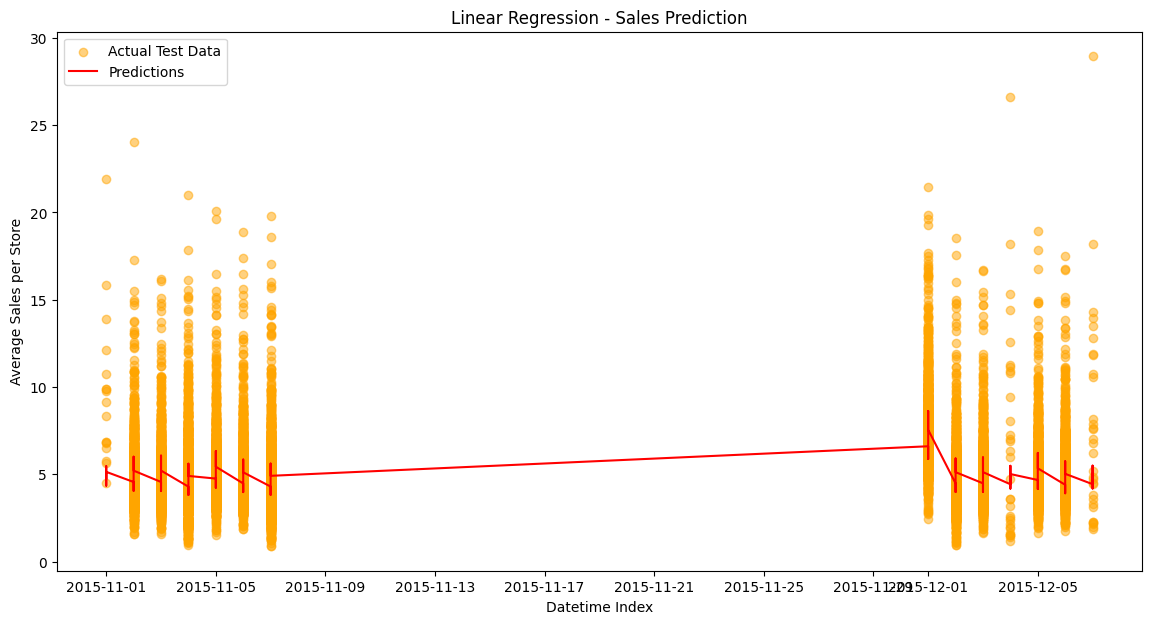

In [330]:
num_stores = len(df2.index.get_level_values('Store').unique())

# Assuming X_train, X_test, y_test, and predictions are defined

# Reset the index for X_train and X_test
X_train_reset = X_train.reset_index()
X_test_reset = X_test.reset_index()

y_test_original_scale = np.exp(y_test.values) / num_stores
predictions_original_scale = np.exp(predictions) / num_stores

# Plotting for the entire dataset
plt.figure(figsize=(14, 7))

# Plotting for test set in original scale
plt.scatter(X_test_reset['Date'], y_test_original_scale, color='orange', label='Actual Test Data', alpha=0.5)

# Plotting predictions in original scale
plt.plot(X_test_reset['Date'], predictions_original_scale, label='Predictions', color='red')

plt.title('Linear Regression - Sales Prediction')
plt.xlabel('Datetime Index')
plt.ylabel('Average Sales per Store')
plt.legend()
plt.show()

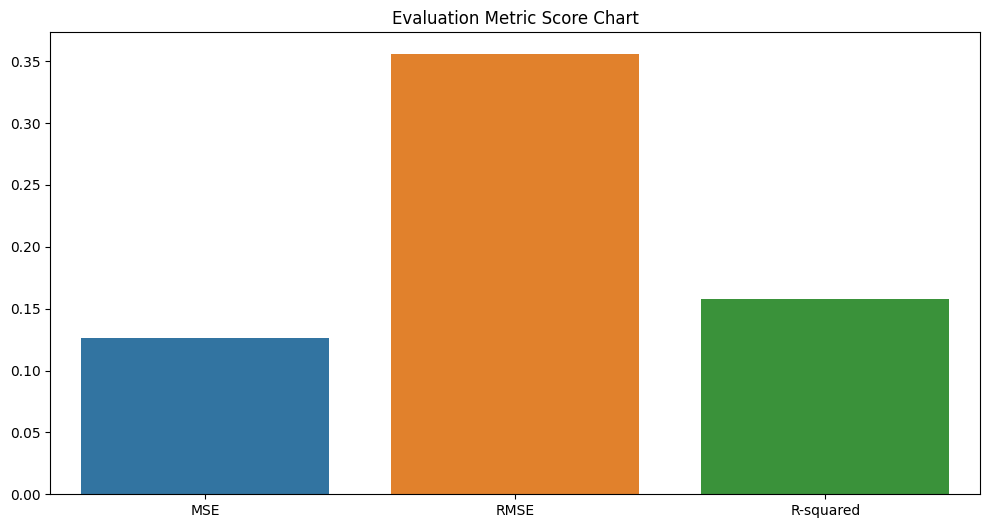

In [325]:
# Visualizing evaluation Metric Score chart
# Evaluation metric score chart
plt.figure(figsize=(12, 6))
metrics = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Evaluation Metric Score Chart')
plt.show()

RMSE is a measure of the average prediction error of the model.
In our case, an RMSE of 0.355 indicates that, on average, our model's predictions have an error of approximately 0.355 units in the same scale as your target variable (Sales).

R-squared is a measure of how well the model explains the variability in the target variable.
An R-squared of 0.157 indicates that your model explains about 15.79% of the variance in the Sales variable. This suggests that the model might not be capturing a substantial portion of the variability in the target variable.

In general, a higher R-squared value is desirable, as it indicates that a larger proportion of the variance in the target variable is explained by the model.

#### 2. Cross- Validation & Hyperparameter Tuning

Linear regression hyperparameters can not help capturing variability in data, hence Another ML model neeed to be used Which can handle different types of data for better prediction.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.


### ML Model - 2 - Decision Tree Regression

In [332]:
# Create a DecisionTreeRegressor with specified hyperparameter values
regressor = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1  # Minimum number of samples required to be at a leaf node
)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = np.sqrt(mse)
r2_2 = r2_score(y_test, y_pred)

print(f"Hyperparameters:")
print(f"  Max Depth: {regressor.get_params()['max_depth']}")
print(f"  Min Samples Split: {regressor.get_params()['min_samples_split']}")
print(f"  Min Samples Leaf: {regressor.get_params()['min_samples_leaf']}")
print(f"Mean Squared Error: {mse_2}")
print(f"Root Mean Squared Error: {rmse_2}")
print(f"R-squared: {r2_2}")

Hyperparameters:
  Max Depth: None
  Min Samples Split: 2
  Min Samples Leaf: 1
Mean Squared Error: 0.03565736799855283
Root Mean Squared Error: 0.19407142085232312
R-squared: 0.7624781804328056


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

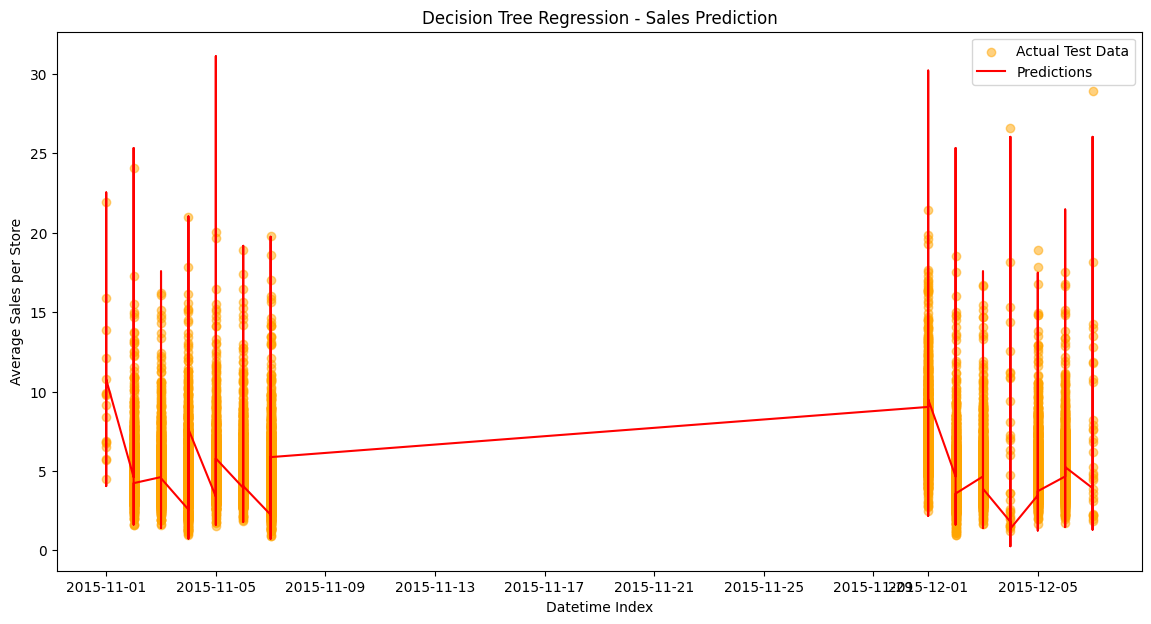

In [331]:
num_stores = len(df2.index.get_level_values('Store').unique())
y_test_original_scale = np.exp(y_test.values) / num_stores
predictions_original_scale = np.exp(y_pred) / num_stores

# Plotting
plt.figure(figsize=(14, 7))

# Plotting for test set in original scale
plt.scatter(X_test_reset['Date'], y_test_original_scale, color='orange', label='Actual Test Data', alpha=0.5)

# Plotting predictions in original scale
plt.plot(X_test_reset['Date'], predictions_original_scale, label='Predictions', color='red')

plt.title('Decision Tree Regression - Sales Prediction')
plt.xlabel('Datetime Index')
plt.ylabel('Average Sales per Store')
plt.legend()
plt.show()

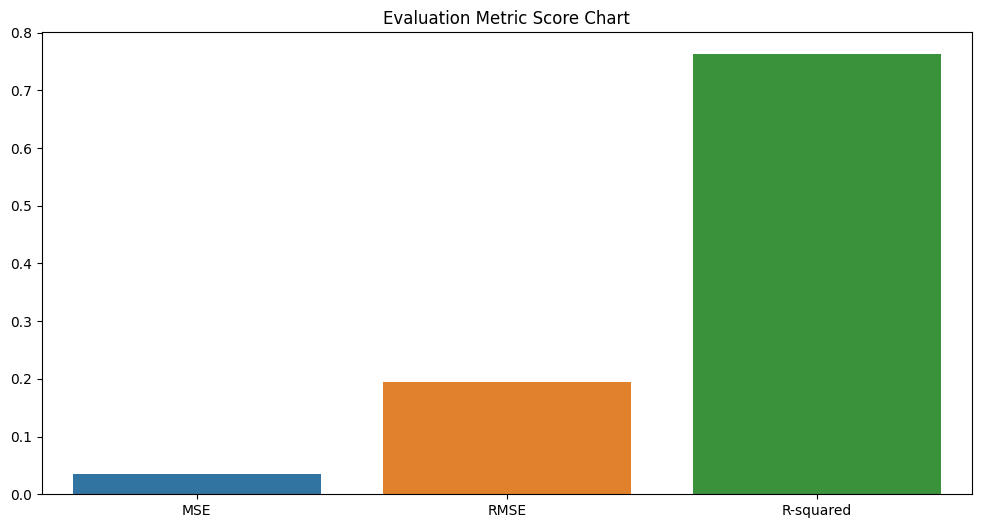

In [333]:
# Visualizing evaluation Metric Score chart
# Evaluation metric score chart
plt.figure(figsize=(12, 6))
metrics = {'MSE': mse_2, 'RMSE': rmse_2, 'R-squared': r2_2}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Evaluation Metric Score Chart')
plt.show()

RMSE is a measure of the average prediction error of the model.
In our case, an RMSE of 0.194 indicates that, on average, our model's predictions have an error of approximately 0.194 units in the same scale as your target variable (Sales). This error is lower compared to Linear regression model.

R-squared is a measure of how well the model explains the variability in the target variable.
An R-squared of 0.762 indicates that your model explains about 76.20% of the variance in the Sales variable. This suggests that the model is capturing a substantial portion of the variability in the target variable.

Though this results are better than linear regression model but hyper-parameter tuning can further improve this results.


#### 2. Cross- Validation & Hyperparameter Tuning

In [335]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Using Gridsearch CV optimization technique
# Define the hyperparameters you want to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the Algorithm
# Train the model with the best hyperparameters
best_regressor = DecisionTreeRegressor(**best_params)
best_regressor.fit(X_train, y_train)

# Predict on the model
# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Evaluate the model
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = np.sqrt(mse)
r2_2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse_2}")
print(f"Root Mean Squared Error: {rmse_2}")
print(f"R-squared: {r2_2}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 0.02872233599144806
Root Mean Squared Error: 0.19407142085232312
R-squared: 0.8086740023215976


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***